<h2>Building A Deep Feed Forward Neural Network (FFNN)for Boolean Classification Tasks(step by step)</h2>

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import copy
import h5py

<h3>Implement Layer Sizes Function</h3>

In [95]:
def layer_sizes(X, Y, num_hidden_units):
    """
    Input:
       - X: array, training set (X)
       - Y: array, training set (Y)
       - num_hidden_units: list or array or tuple, contains number of units in each hidden layer
    """
    num_hidden_units = list(num_hidden_units)
    
    num_input_units = [X.shape[0]]
    num_output_units = [Y.shape[0]]
    
    layer_dimensions = list(num_input_units + num_hidden_units + num_output_units)
    
    return layer_dimensions   

In [96]:
l = layer_sizes(np.array([[2,3],[2,4],[3,5]]), np.array([[1,2]]), [2,3,4])
print(np.array([[2,3],[2,4],[3,5]]).shape)
print(np.array([[1,2]]).shape)
print(l)
print(type(l))

(3, 2)
(1, 2)
[3, 2, 3, 4, 1]
<class 'list'>


<h3>Implement initialize parameters function</h3>

In [159]:
def initialize_parameters(layer_dimensions, beta):
    """
    Input:
       - layer_dims: python array (list) containing the dimensions of each layer in our network
       - beta: float, used to initialize Ws
    Output:
       - parameters: python dictionary containing your parameters                
    """
    
    parameters = {}
    L = len(layer_dimensions) # number of layers in the network

    for l in range(1, L):
    
        parameters[f"W{l}"] = np.random.randn(layer_dimensions[l], layer_dimensions[l - 1]) / np.sqrt(layer_dimensions[l-1])
        parameters[f"b{l}"] = np.zeros((layer_dimensions[l], 1))
           
    return parameters

In [98]:
parameters = initialize_parameters([5, 4, 3, 1], 0.01)
print(parameters)
print(parameters["W1"].shape)
print(parameters["b1"].shape)
print(parameters["W2"].shape)
print(parameters["b2"].shape)
print(parameters["W3"].shape)
print(parameters["b3"].shape)

{'W1': array([[ 0.00741746,  0.00059239, -0.00129716, -0.00516631, -0.01964366],
       [ 0.00144049,  0.00360094,  0.0076202 ,  0.00543292, -0.01360841],
       [-0.00263615, -0.00956246,  0.01326102, -0.00478658, -0.00093542],
       [-0.00108619,  0.00620289,  0.00746571, -0.01323246,  0.00047989]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 0.01216375, -0.00059193, -0.0181299 ,  0.00451772],
       [ 0.00890855,  0.00597602,  0.0138061 , -0.00678763],
       [ 0.00581462, -0.00144376, -0.00604487, -0.01259348]]), 'b2': array([[0.],
       [0.],
       [0.]]), 'W3': array([[-0.00198424, -0.00531366, -0.00517905]]), 'b3': array([[0.]])}
(4, 5)
(4, 1)
(3, 4)
(3, 1)
(1, 3)
(1, 1)


<h3>Implement Sigmoid Activation Function</h3>

In [99]:
def sigmoid(Z):
    """
    Input
       - Z: numpy array of any shape
    
    Output:
       - A: output of sigmoid(z), same shape as Z
       - cache: returns Z as well, useful during backpropagation
    """
    
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    
    return A, cache


<h3>Implement Relu activation function</h3>

In [100]:
def relu(Z):
    """
    
    Input:
       - Z: Output of the linear layer, of any shape

    Output:
       - A: Post-activation parameter, of the same shape as Z
       - cache: a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0, Z)
    cache = Z 
    
    return A, cache

<h3>Implement forward propagation</h3>

In [101]:
def linear_forward(A, W, b):
    """

    Input:
       - A: activations from previous layer (or input data): (size of previous layer, number of examples)
       - W: weights matrix: numpy array of shape (size of current layer, size of previous layer)
       - b: bias vector, numpy array of shape (size of the current layer, 1)

    Output:
       - Z: the input of the activation function, also called pre-activation parameter 
       - cache: a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = np.dot(W, A) + b

    cache = (A, W, b)
    
    return Z, cache

In [102]:
def linear_activation_forward(A_prev, W, b, activation):
    """

    Input:
       - A_prev: activations from previous layer (or input data): (size of previous layer, number of examples)
       - W: weights matrix: numpy array of shape (size of current layer, size of previous layer)
       - b: bias vector, numpy array of shape (size of the current layer, 1)
       - activation: the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Output:
       - A: the output of the activation function, also called the post-activation value 
       - cache: a python tuple containing "linear_cache" and "activation_cache"; 
                stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
    
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)

    return A, cache

In [103]:
def forward_propagation(X, parameters, hidden_activation, output_activation):
    """
   
    
    Input:
       - X: data, numpy array of shape (input size, number of examples)
       - parameters: output of initialize_parameters()
       - hidden_activation: str, activation function of hidden layers
       - output_activation: str, activation function of output layer
    
    Output:
       - AL: activation value from the output (last) layer
       - caches: list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2 # number of layers in the neural network
    
    for l in range(1, L):
        A_prev = A 
    
        A, cache = linear_activation_forward(A_prev, parameters[f"W{l}"], parameters[f"b{l}"], hidden_activation)
        caches.append(cache)
        
    AL, cache = linear_activation_forward(A, parameters[f"W{L}"], parameters[f"b{L}"], output_activation)
    caches.append(cache)
          
    return AL, caches

In [104]:
AL, caches = forward_propagation(np.array([[1,4,3],[4,3,2],[4,3,2],[3,2,1],[6,5,4]]), parameters, "relu", "sigmoid")
print(len(parameters))
print(np.array([[1,4,3],[4,3,2],[4,3,2],[3,2,1],[6,5,4]]).shape)
print(AL)
print(caches)

6
(5, 3)
[[0.49999996 0.49999997 0.49999997]]
[((array([[1, 4, 3],
       [4, 3, 2],
       [4, 3, 2],
       [3, 2, 1],
       [6, 5, 4]]), array([[ 0.00741746,  0.00059239, -0.00129716, -0.00516631, -0.01964366],
       [ 0.00144049,  0.00360094,  0.0076202 ,  0.00543292, -0.01360841],
       [-0.00263615, -0.00956246,  0.01326102, -0.00478658, -0.00093542],
       [-0.00108619,  0.00620289,  0.00746571, -0.01323246,  0.00047989]]), array([[0.],
       [0.],
       [0.],
       [0.]])), array([[-0.12876251, -0.08099538, -0.0628981 ],
       [-0.01902666, -0.01775082, -0.02223696],
       [-0.00781421, -0.0136992 , -0.00903961],
       [ 0.01677016,  0.01259557,  0.01276573]])), ((array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.01677016, 0.01259557, 0.01276573]]), array([[ 0.01216375, -0.00059193, -0.0181299 ,  0.00451772],
       [ 0.00890855,  0.00597602,  0.0138061 , -0.00678763],
     

<h3>Implement cost function (cross-entropy)</h3>

In [105]:
def compute_cost(A, Y):
    """
  
    Input:
       - A: probability vector corresponding to your label predictions, shape (1, number of examples)
       - Y: true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Output:
       - cost: cross-entropy cost
    """
    
    m = Y.shape[1]

    cost = - np.sum(np.multiply(Y, np.log(A)) + np.multiply(1-Y, np.log(1-A))) / m
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect.

    return cost

In [106]:
print(compute_cost(AL, np.array([[1,2,3]])))

0.6931473574331374


<h3>Implement backward sigmoid activation function</h3>

In [107]:
def sigmoid_backward(dA, cache):
    """
    Input:

       - dA: post-activation gradient, of any shape
       - cache:'Z' where we store for computing backward propagation efficiently

    Output:
       - dZ: Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    S = 1 / (1 + np.exp(-Z))
    
    dZ = dA * S * (1-S)
    
    #assert (dZ.shape == Z.shape)
    
    return dZ

<h3>Implement backward relu activation function</h3>

In [108]:
def relu_backward(dA, cache):
    """
    Input:
       - dA: post-activation gradient, of any shape
       - cache: 'Z' where we store for computing backward propagation efficiently

    Output:
       - dZ: Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    #assert (dZ.shape == Z.shape)
    
    return dZ

<h3>Implement Backward Propagation</h3>

In [109]:
def linear_backward(dZ, cache):
    """

    Input:
       - dZ: Gradient of the cost with respect to the linear output (of current layer l)
       - cache: tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Output:
       - dA_prev: Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
       - dW: Gradient of the cost with respect to W (current layer l), same shape as W
       - db: Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [110]:
def linear_activation_backward(dA, cache, activation):
    """
    Input:
       - dA: post-activation gradient for current layer l 
       - cache: tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
       - activation: the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Output:
       - dA_prev: Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
       - dW: Gradient of the cost with respect to W (current layer l), same shape as W
       - db: Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        
        dZ = relu_backward(dA, activation_cache) 
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
       
        dZ = sigmoid_backward(dA, activation_cache) 
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

In [111]:
def backward_propagation(AL, Y, caches, hidden_activation, output_activation):
    """
    Input:
       - AL: probability vector, output of the forward propagation (L_model_forward())
       - Y: true "label" vector (containing 0 if non-cat, 1 if cat)
       - caches: list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
       - hidden_activation: str, activation function of hidden layers
       - output_activation: str, activation function of output layer
    
    Output:
       - grads: A dictionary with the gradients
                grads[f"dA{l}"] = ... 
                grads[f"dW{l}"] = ...
                grads[f"db{l}"] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[-1]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(dAL, current_cache, output_activation)
    grads["dA" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    
    for l in reversed(range(L-1)):
       
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads[f"dA{l+1}"], current_cache, hidden_activation)
        grads[f"dA{l}"] = dA_prev_temp
        grads[f"dW{l+1}"] = dW_temp
        grads[f"db{l+1}"] = db_temp

    return grads

In [112]:
grads = backward_propagation(AL, np.array([[1,2,3]]), caches, "relu", "sigmoid")
print(grads)

{'dA2': array([[0.00099212, 0.00297637, 0.00496061],
       [0.00265683, 0.00797048, 0.01328414],
       [0.00258953, 0.00776858, 0.01294763]]), 'dW3': array([[-8.91387923e-05,  0.00000000e+00,  0.00000000e+00]]), 'db3': array([[-1.50000003]]), 'dA1': array([[ 1.20679331e-05,  3.62037973e-05,  6.03396617e-05],
       [-5.87266129e-07, -1.76179829e-06, -2.93633046e-06],
       [-1.79870799e-05, -5.39612367e-05, -8.99353939e-05],
       [ 4.48213253e-06,  1.34463968e-05,  2.24106612e-05]]), 'dW2': array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.91509798e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]), 'db2': array([[0.00297637],
       [0.        ],
       [0.        ]]), 'dA0': array([[-4.86843788e-09, -1.46053128e-08, -2.43421878e-08],
       [ 2.78021606e-08,  8.34064770e-08,  1.39010794e-07],
       [ 3.34622913e-08,  1.00386868e-07,  1.67311446e-07],
       [-5.93096173

<h3>Implement Update Parameters function</h3>

In [113]:
def update_parameters(params, grads, learning_rate):
    """
    Input:
       - params: python dictionary containing your parameters 
       - grads: python dictionary containing your gradients, output of L_model_backward
    
    Output:
       - parameters: python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = copy.deepcopy(params)
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
    
        parameters[f"W{l+1}"] -= learning_rate * grads[f"dW{l+1}"]
        parameters[f"b{l+1}"] -= learning_rate * grads[f"db{l+1}"]
        
    return parameters

<h3>Implement predict function</h3>

In [249]:
def predict(X, Y, parameters, hidden_activation="relu", output_activation="sigmoid"):
    """
    Input:
       - X: data set of examples you would like to label
       - parameters: parameters of the trained model
    
    Output:
       - predicted: predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    predicted = np.zeros((1, m))
    
    # Forward propagation
    probas, caches = forward_propagation(X, parameters, hidden_activation, output_activation)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            predicted[0,i] = 1
        else:
            predicted[0,i] = 0
            
    print(f"Accuracy: {np.sum((predicted == Y)/m)}")
        
    return predicted

<h3>Implement train function</h3>

In [224]:
def train(X, Y, num_hidden_units, hidden_activation="relu", output_activation="sigmoid", epochs=1000, learning_rate=1e-4, print_cost=100):

    """
    Input:
       - X: array, training set(X) with shape (number of features, number of examples)
       - Y: array, training set(Y) with shape (1, number of examples)
       - hidden_activation: str, activation function of hidden layers
       - output_activation: str, activation function of output layer
       - epochs: integer, number of iteration
       - learning_rate: integer, learning rate
       - print_cost: integer
    Output:
       - parameters: dictionary, optimized parameters
       - costs: list
       
    """
    costs = []
    
    layer_dimensions = layer_sizes(X, Y, num_hidden_units)
    parameters = initialize_parameters(layer_dimensions, beta)

    for i in range(epochs):

        AL, caches = forward_propagation(X, parameters, hidden_activation, output_activation)

        cost = compute_cost(AL, Y)
        

        grads = backward_propagation(AL, Y, caches, hidden_activation, output_activation)

        parameters = update_parameters(parameters, grads, learning_rate)

        if i % print_cost == 0 or i == epochs-1:
            print(f"Epoch: {i}; Cost: {cost}")
            costs.append(cost)
            
    return parameters, costs      
    

<h3>Train the model</h3>

In [190]:
np.random.seed(6)
noisy_circles = sklearn.datasets.make_circles(n_samples=5000, factor=.5, noise=.3)
print(noisy_circles[0].shape)
print(noisy_circles[1].shape)

(5000, 2)
(5000,)


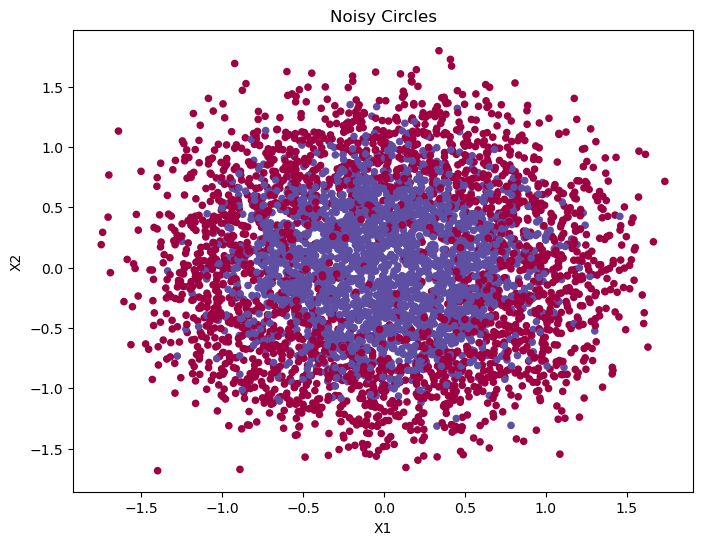

In [191]:
X, Y = noisy_circles
X, Y = X.T, Y.reshape(1, Y.shape[0])

plt.figure(figsize=(8, 6))
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title("Noisy Circles")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [192]:
print(X.shape)
print(Y.shape)

(2, 5000)
(1, 5000)


In [193]:
X_train = X[:, :4000]
Y_train = Y[:, :4000]
X_test = X[:, 4000:]
Y_test = Y[:, 4000:]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2, 4000)
(1, 4000)
(2, 1000)
(1, 1000)


In [234]:
parameters1, costs1 = train(
    X=X_train, 
    Y=Y_train, 
    num_hidden_units=[5, 2], 
    hidden_activation="relu", 
    output_activation="sigmoid",
    epochs=10000, 
    learning_rate=0.009, 
    print_cost=500
)

Epoch: 0; Cost: 0.6822707587690231
Epoch: 500; Cost: 0.675034434857393
Epoch: 1000; Cost: 0.6722853652568926
Epoch: 1500; Cost: 0.6694904110502052
Epoch: 2000; Cost: 0.6666979164660377
Epoch: 2500; Cost: 0.6633653859669453
Epoch: 3000; Cost: 0.6534290351587306
Epoch: 3500; Cost: 0.637021666771696
Epoch: 4000; Cost: 0.6181109538310595
Epoch: 4500; Cost: 0.595811524146287
Epoch: 5000; Cost: 0.5690643290724139
Epoch: 5500; Cost: 0.5414355647477357
Epoch: 6000; Cost: 0.5181251090342565
Epoch: 6500; Cost: 0.5004707321362027
Epoch: 7000; Cost: 0.48784293685463526
Epoch: 7500; Cost: 0.4790295266501374
Epoch: 8000; Cost: 0.4728616926025821
Epoch: 8500; Cost: 0.46859695016274505
Epoch: 9000; Cost: 0.4653636354708867
Epoch: 9500; Cost: 0.4629849501790191
Epoch: 9999; Cost: 0.4612641454539597


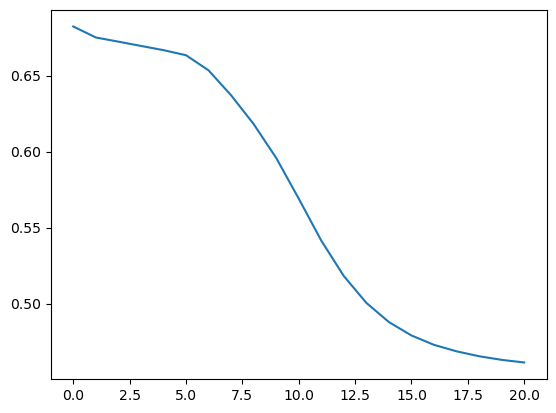

In [235]:
plt.plot(costs1)
plt.show()

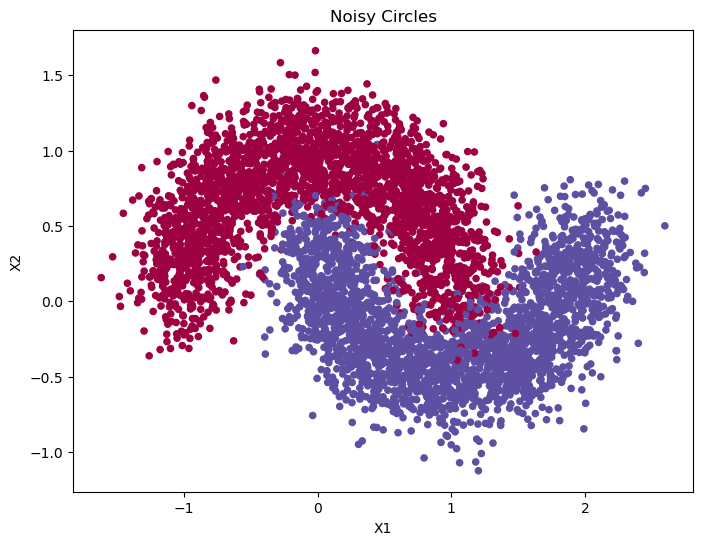

In [236]:
noisy_moons = sklearn.datasets.make_moons(n_samples=5000, noise=.2)
X, Y = noisy_moons
X, Y = X.T, Y.reshape(1, Y.shape[0])

plt.figure(figsize=(8, 6))
plt.scatter(X[0, :], X[1, :], c=Y, s=20, cmap=plt.cm.Spectral)
plt.title("Noisy Circles")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [237]:
X_train = X[:, :4000]
Y_train = Y[:, :4000]
X_test = X[:, 4000:]
Y_test = Y[:, 4000:]

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2, 4000)
(1, 4000)
(2, 1000)
(1, 1000)


In [238]:
params_, cost_ = train(
     X=X_train, 
     Y=Y_train, 
     num_hidden_units=[10, 8, 4, 2], 
     hidden_activation="relu", 
     output_activation="sigmoid",
     epochs=10000, 
     learning_rate=0.003, 
     print_cost=500
)

Epoch: 0; Cost: 0.6930077759711172
Epoch: 500; Cost: 0.6929657692529304
Epoch: 1000; Cost: 0.6929190055772062
Epoch: 1500; Cost: 0.6928505816722509
Epoch: 2000; Cost: 0.6926793599535583
Epoch: 2500; Cost: 0.6921927901581134
Epoch: 3000; Cost: 0.690847598206459
Epoch: 3500; Cost: 0.6892507633434984
Epoch: 4000; Cost: 0.6871592364374958
Epoch: 4500; Cost: 0.6842216298768351
Epoch: 5000; Cost: 0.6798505705056547
Epoch: 5500; Cost: 0.6725111972195461
Epoch: 6000; Cost: 0.6580032264840024
Epoch: 6500; Cost: 0.6275394236695734
Epoch: 7000; Cost: 0.5767759266459586
Epoch: 7500; Cost: 0.5279279512249122
Epoch: 8000; Cost: 0.49153452744225795
Epoch: 8500; Cost: 0.46171938666708856
Epoch: 9000; Cost: 0.43598959489611605
Epoch: 9500; Cost: 0.4131425830624046
Epoch: 9999; Cost: 0.3922806640850833


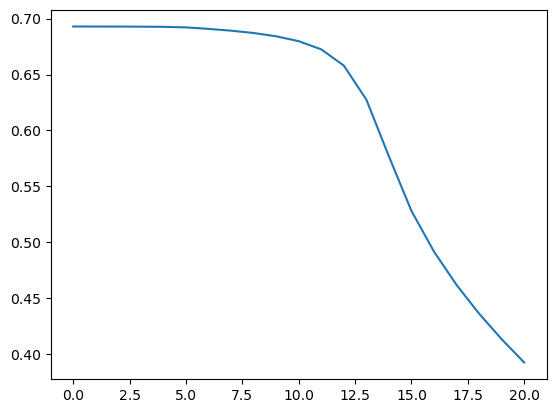

In [239]:
plt.plot(cost_)
plt.show()

In [240]:
train_dataset = h5py.File("/home/samani/Documents/projects/deep-learning/data/train_cat.h5", "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # your train set labels

test_dataset = h5py.File("/home/samani/Documents/projects/deep-learning/data/test_cat.h5", "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:])  # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:])  # your test set labels

classes = np.array(test_dataset["list_classes"][:])  # the list of classes

train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))


In [241]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print(train_set_x_flatten.shape)
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [242]:
X_train = train_set_x_flatten / 255
Y_train = train_set_y_orig
X_test = test_set_x_flatten / 255
Y_test = test_set_y_orig
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12288, 209)
(1, 209)
(12288, 50)
(1, 50)


In [244]:
params, costs_ = train(
    X=X_train, 
    Y=Y_train, 
    num_hidden_units=[20, 10, 8, 4], 
    hidden_activation="relu", 
    output_activation="sigmoid",
    epochs=2500, 
    learning_rate=0.002, 
    beta=0.01,
    print_cost=100
)

Epoch: 0; Cost: 0.6803190345795833
Epoch: 100; Cost: 0.5998465481801446
Epoch: 200; Cost: 0.5297993350814021
Epoch: 300; Cost: 0.49826362368562027
Epoch: 400; Cost: 0.4420456119467501
Epoch: 500; Cost: 0.395243290976183
Epoch: 600; Cost: 0.36443859522486477
Epoch: 700; Cost: 0.27544053552141784
Epoch: 800; Cost: 0.2844634739320144
Epoch: 900; Cost: 0.21987363982756875
Epoch: 1000; Cost: 0.16855044823237467
Epoch: 1100; Cost: 0.12123100640058497
Epoch: 1200; Cost: 0.1116052568364846
Epoch: 1300; Cost: 0.08680982292517628
Epoch: 1400; Cost: 0.07217089446952825
Epoch: 1500; Cost: 0.05786173522926363
Epoch: 1600; Cost: 0.048003680605192806
Epoch: 1700; Cost: 0.04051804666023939
Epoch: 1800; Cost: 0.03459129601608599
Epoch: 1900; Cost: 0.029955316438881156
Epoch: 2000; Cost: 0.02626822177342783
Epoch: 2100; Cost: 0.023182099960815997
Epoch: 2200; Cost: 0.020710559050280512
Epoch: 2300; Cost: 0.01860865825854188
Epoch: 2400; Cost: 0.016802867314435473
Epoch: 2499; Cost: 0.01531831244964553


In [250]:
train_predict = predict(X_train, Y_train, params)

Accuracy: 0.9999999999999998


In [251]:
test_predict = predict(X_test, Y_test, params)

Accuracy: 0.6799999999999999
